# Comparing Political Party and Income of US states
### By Jillian Arthur
### 12/10/2024

#### I am going to be analyzing the average income by state, and each state's political party to see if there is a correlation. I am curious about the results of this, as politics are a very relevant topic right now in the United States. We are very divided as a nation, and this is due to politics. Income is only one thing that may tend to differ depending on the political views of a state. I chose to analyze income because this data can tell us a lot about each state, and voting patterns. It can also be useful to policymakers and campaign strategies to target certain populations. Within this notebook, I hope to get a better understanding on if there is a connection between income and political affiliation, and what that connection may be. 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### This is a data frame showing each state, and which political party they favored in the 2020 presidential election. It is safe to say that it is generally similar for the recent, 2024 election. For states such as Nebraska and Maine, the electoral votes were split, according to 270 to win. https://www.270towin.com/content/split-electoral-votes-maine-and-nebraska/. All of the information in my table is from Wikipedia. I copied it and put it into a table, and downloaded that to a csv file to import. Here is where I got the data: https://en.wikipedia.org/wiki/Political_party_strength_in_U.S._states. I know that this data is accurate because it was last edited on November 24th of this year, well after the 2020 election. Also, there is a list of references at the bottom of the page listing where all of the information comes from, many of these being up to date, and also non-biased sources. One of these sources is the US Census, which I also used data from for this project and will talk about more in detail later on. 

In [4]:
ppbs = pd.read_csv('PPBS.csv', header=0) 
ppbs.head(51)

,State,Political Affiliation
0,Alabama,Republican
1,Alaska,Republican
2,Arizona,Democratic
3,Arkansas,Republican
4,California,Democratic
5,Colorado,Democratic
6,Connecticut,Democratic
7,Delaware,Democratic
8,Florida,Republican
9,Georgia,Democratic


#### This is data from the United States Census. We know that this is reliable data because is it a government affiliated website. It contains income statistics per state, as well as each type of household for each state. It has data for families within a household, non families, married and non married households, and the margin of error for each of these. Each catagory has information about the median and mean for each column. It also shows what percentage of each column makes a certain salary. The information is provided by: https://data.census.gov/table/ACSST1Y2023.S1901?q=income&t=Disability&g=010XX00US$0400000

In [5]:
income = pd.read_csv('ACSST1Y2023.S1901-2024-11-18T232047.csv')
income.head(17)

,Label (Grouping),Alabama!!Households!!Estimate,Alabama!!Households!!Margin of Error,Alabama!!Families!!Estimate,Alabama!!Families!!Margin of Error,Alabama!!Married-couple families!!Estimate,Alabama!!Married-couple families!!Margin of Error,Alabama!!Nonfamily households!!Estimate,Alabama!!Nonfamily households!!Margin of Error,Alaska!!Households!!Estimate,...,Wyoming!!Nonfamily households!!Estimate,Wyoming!!Nonfamily households!!Margin of Error,Puerto Rico!!Households!!Estimate,Puerto Rico!!Households!!Margin of Error,Puerto Rico!!Families!!Estimate,Puerto Rico!!Families!!Margin of Error,Puerto Rico!!Married-couple families!!Estimate,Puerto Rico!!Married-couple families!!Margin of Error,Puerto Rico!!Nonfamily households!!Estimate,Puerto Rico!!Nonfamily households!!Margin of Error
0,Total,"2,051,545","±10,192","1,328,854","±12,989","949,532","±12,487","722,691","±13,007","276,852",...,"92,949","±4,365","1,277,486","±11,386","798,202","±13,321","434,951","±10,631","479,284","±11,734"
1,"Less than $10,000",6.4%,±0.3,3.8%,±0.3,1.4%,±0.2,12.0%,±0.6,4.1%,...,9.2%,±1.8,21.1%,±0.8,15.4%,±0.8,6.9%,±0.6,33.0%,±1.2
2,"$10,000 to $14,999",4.8%,±0.3,2.4%,±0.3,0.8%,±0.1,9.8%,±0.7,2.5%,...,7.1%,±1.4,10.6%,±0.5,7.8%,±0.5,6.3%,±0.7,16.1%,±0.9
3,"$15,000 to $24,999",9.0%,±0.4,5.8%,±0.4,2.9%,±0.3,15.5%,±0.9,5.7%,...,12.9%,±1.8,17.4%,±0.6,16.9%,±0.7,15.5%,±0.9,19.5%,±1.1
4,"$25,000 to $34,999",8.9%,±0.3,6.5%,±0.4,4.3%,±0.3,13.5%,±0.7,5.4%,...,13.2%,±2.2,12.5%,±0.6,13.4%,±0.7,12.7%,±0.9,10.8%,±0.8
5,"$35,000 to $49,999",11.4%,±0.4,10.6%,±0.4,8.6%,±0.4,13.6%,±0.6,10.6%,...,12.3%,±1.6,12.7%,±0.5,14.7%,±0.7,15.3%,±1.0,8.2%,±0.7
6,"$50,000 to $74,999",17.3%,±0.5,17.5%,±0.7,16.7%,±0.7,16.5%,±0.8,15.2%,...,19.6%,±2.5,12.2%,±0.5,14.5%,±0.7,18.2%,±1.0,6.9%,±0.7
7,"$75,000 to $99,999",13.2%,±0.5,15.2%,±0.6,16.9%,±0.7,8.7%,±0.7,13.3%,...,11.4%,±2.2,5.6%,±0.4,7.1%,±0.5,10.0%,±0.8,2.3%,±0.4
8,"$100,000 to $149,999",15.6%,±0.4,19.7%,±0.6,24.2%,±0.7,7.0%,±0.5,19.4%,...,8.1%,±1.7,4.8%,±0.4,6.3%,±0.5,9.1%,±0.9,1.8%,±0.3
9,"$150,000 to $199,999",6.7%,±0.3,8.9%,±0.4,11.5%,±0.5,2.0%,±0.3,10.4%,...,2.0%,±0.7,1.6%,±0.2,2.0%,±0.3,2.9%,±0.5,0.6%,±0.2


#### I took the information from this data frame and put it into a Google Sheets. I took out the columns and rows that I will not be analizing, so it is narrowed down to the mean income of each state, and just the households estimate from each because that is most relevant to me. That information is below.

In [6]:
income2 = pd.read_csv('Income by States - Sheet1.csv', header=0) 
income2.head(51)

,Unnamed: 0,Mean Income (Dollars)
0,Alabama,"85,530"
1,Alaska,"114,201"
2,Arizona,"104,620"
3,Arkansas,"81,056"
4,California,"134,491"
5,Colorado,"124,578"
6,Conneticut,"131,007"
7,Delaware,"109,486"
8,District of Columbia,"160,752"
9,Florida,"103,634"


In [7]:
income_sorted = income2.sort_values(by='Mean Income (Dollars)', ascending=False)

In [8]:
print(income_sorted.head(51))

              Unnamed: 0 Mean Income (Dollars)
12                 Idaho                98,653
34          North Dakota                98,324
33        North Carolina                98,139
49             Wisconsin                97,894
19                 Maine                97,157
41          South Dakota                96,650
42             Tennessee                94,180
26               Montana                94,069
15                  Iowa                93,942
22              Michigan                93,806
16                Kansas                93,781
35                  Ohio                93,500
50               Wyoming                93,304
25              Missouri                93,074
40        South Carolina                92,578
14               Indiana                91,900
31            New Mexico                85,782
36              Oklahoma                85,650
0                Alabama                85,530
17              Kentucky                83,499
18           

#### At this point, my data seems to be sorting itself incorrectly. The first digit of the top values is not accounted for, so the data starts at 101,268 instead of 76,305 which is the actual lowest value. I used chat GPT to try and solve this issue. 'str.replace' accesses the column and replaces the comma values with an empty string, which is simply a string containing no characters. I then used chat GPT to figure out how to rename the column from Unnamed: 0 to State and put this into a data frame. 

In [9]:
income2['Mean Income (Dollars)'] = income2['Mean Income (Dollars)'].str.replace(',', '').astype(float)

In [10]:
income_sorted = income2.sort_values(by='Mean Income (Dollars)', ascending=False)

In [11]:
income_sorted.rename(columns={
    'Unnamed: 0': 'State',
    'Mean Income (Dollars)': 'Mean Income (USD)'
}, inplace=False,)

,State,Mean Income (USD)
8,District of Columbia,160752.0
21,Massachussetts,138516.0
30,New Jersey,138153.0
4,California,134491.0
6,Conneticut,131007.0
20,Maryland,129366.0
47,Washington,129161.0
11,Hawaii,124713.0
5,Colorado,124578.0
29,New Hampshire,124500.0


#### I have now correctly sorted my data by income, highest to lowest.

In [12]:
top_5_income = income_sorted.head(5)

In [13]:
state_names = top_5_income['Unnamed: 0']

In [14]:
top_5_income

,Unnamed: 0,Mean Income (Dollars)
8,District of Columbia,160752.0
21,Massachussetts,138516.0
30,New Jersey,138153.0
4,California,134491.0
6,Conneticut,131007.0


#### This is a new data frame showing only the top 5 states with the highest income. I will be only focusing on these states for the time being. 

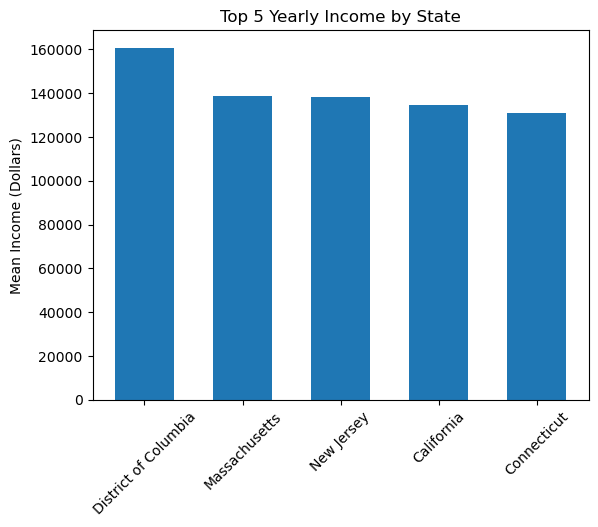

In [15]:
fig1, ax1 = plt.subplots()

x_positions = np.arange(len(top_5_income))

ax1.bar(x_positions, top_5_income['Mean Income (Dollars)'], width=0.6)
ax1.set_xticks([0, 1, 2, 3, 4], ["District of Columbia", "Massachusetts", "New Jersey", "California", "Connecticut"], rotation = 45)

ax1.set_ylabel("Mean Income (Dollars)")
plt.title("Top 5 Yearly Income by State")
plt.show()

#### This is a bar graph showing the top 5 states with the highest yearly income. One of the states is the District of Columbia, which the Wikipedia article I got my data from did not include. However, the other states on the list were included. I had a bit of a hard time formatting the graph to look how I wanted it to look. At first, the bars weren't spaced evenly, and they were too thin and therefore a bit hard to see. I was able to use ChatGPT to fix these issues. 

In [16]:
states_to_show = ['Massachusetts', 'New Jersey', 'California', 'Connecticut']

filtered_ppbs = ppbs[ppbs['State'].isin(states_to_show)]

print(filtered_ppbs)

            State Political Affiliation
4      California            Democratic
6     Connecticut            Democratic
20  Massachusetts            Democratic
29     New Jersey            Democratic


#### All of these states are states that favored democrat canidates in the 2020 presidential election. I will now analyze the states with the lowest income. I used ChatGPT to filter this data and only show me these states. I will now do the same which the lowest earning states.

In [17]:
bottom_5_income = income_sorted.tail(5)

In [18]:
bottom_5_income

,Unnamed: 0,Mean Income (Dollars)
17,Kentucky,83499.0
18,Louisiana,83303.0
3,Arkansas,81056.0
48,West Virginia,76585.0
24,Mississippi,76305.0


#### These are the states with the lowest yearly income in the US. 

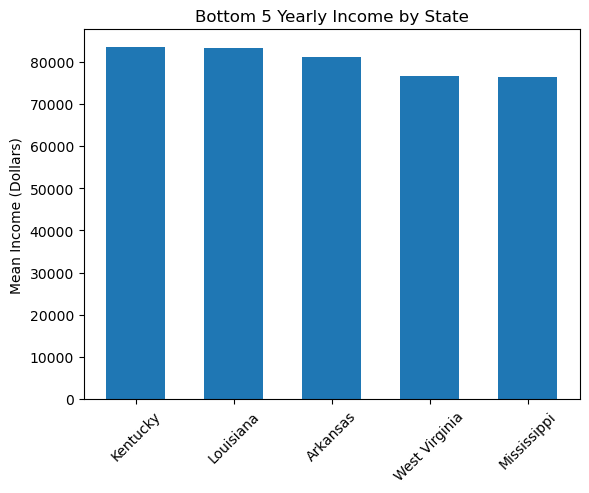

In [21]:
fig2, ax1 = plt.subplots()

x_positions = np.arange(len(bottom_5_income))

ax1.bar(x_positions, bottom_5_income['Mean Income (Dollars)'], width=0.6)
ax1.set_xticks([0, 1, 2, 3, 4], ["Kentucky", "Louisiana", "Arkansas", "West Virginia", "Mississippi"], rotation = 45)
ax1.set_ylabel("Mean Income (Dollars)")
plt.title("Bottom 5 Yearly Income by State")
plt.show()

#### This is a bar graph showing the bottom 5 state's yearly income according to the US Census.

In [20]:
states_to_show = ['Kentucky', 'Louisiana', 'Arkansas', 'West Virginia', 'Mississippi']

filtered_ppbs = ppbs[ppbs['State'].isin(states_to_show)]

print(filtered_ppbs)

            State Political Affiliation
3        Arkansas            Republican
16       Kentucky            Republican
17      Louisiana            Republican
23    Mississippi            Republican
47  West Virginia            Republican


#### All of the lowest earning states happen to be Republican. Because of this, it is clear that to some extent, there is some kind of correlation between income and political party by state. 

#### There are limitations to this analysis however. For example, this data only highlights political party and income. It does not highlight factors that may have led to the states identifying with these things. Each state's yearly income could be due to laws or policies within the states. Factors such as access to or quality of education, government funding, employment, state taxes, cost of living, and much more also affect income for each state. There are hundreds of factors that lead to one's income, so political party cannot be the defining factor in all scenarios. This study would be able to supply us with much more information if we considered these factors as well for each state. 

#### So far with what we have, we can start to consider why this connection exists, and which of these factors are most responsible for the outcome. We could also ask what is the cause, and what is the effect in this situation. Does being a Republican lead to earning less money? Or do people who earn less money become Republican? Perhaps neither is true and more Republicans are just born into poor families and don’t tend to ever switch parties Same thing for Democrats. Or it could be a mix of both. Another question one can ask from the data is how it changes over time, and how it differed in the past. Political party by state could have changed over time for sure, so this project would probably look very different if the data was from a different time. 